In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def solucionador01(x0, xf, dx, t0, tf, dt, c, rho):
    x = np.arange(x0, xf+dx, dx)
    t = np.arange(t0, tf+dt, dt)

    UPre = np.zeros(len(x))
    VPre = np.zeros(len(x))
    for i in range(len(x)):
        UPre[i] = np.exp(np.cos((2 * np.pi * (i*dx)) / xf))

    UFut = np.zeros(len(x))
    VFut = np.zeros(len(x))

    for n in range(1, len(t)-1):
        for i in range(1, len(x)-1):
          VFut[i] = rho*dt*(UPre[i]-VPre[i])+VPre[i]
          UFut[i] = UPre[i] +(-c*dt)/(2*dx)*(UPre[i+1]-UPre[i-1])
        # Condiciones de frontera periódicas
        UFut[0] = UFut[-2]
        UFut[-1] = UFut[1]
        UPre[:] = UFut[:]
        VFut[0] = VFut[-2]
        VFut[-1] = VFut[1]
        VPre[:] = VFut[:]

    return x, UFut, VFut

In [ ]:
x0 = 0; xf = 5; dx = 0.125
t0 = 0; tf = 30; dt = 0.001
c = 1
rho =1
x, UFut, VFut = solucionador01(x0, xf, dx, t0, tf, dt, c, rho)

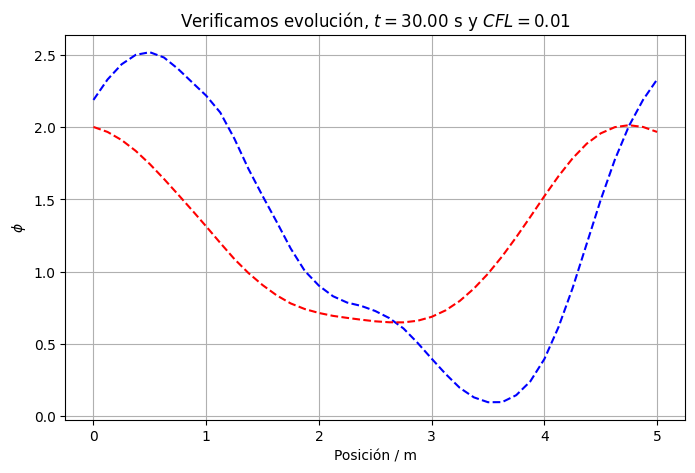

In [ ]:
plt.figure(3, figsize=(8,5))
plt.plot(x, UFut, "--b")
plt.plot(x, VFut, "--r")
plt.title("Verificamos evolución, $t={:.2f}$ s y $CFL = {:.2f}$".format(tf, c*dt/dx))
plt.xlabel("Posición / m")
plt.ylabel("$\phi$")
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def solucionador01(x0, xf, dx, t0, tf, dt, c, rho):
    x = np.arange(x0, xf+dx, dx)
    t = np.arange(t0, tf+dt, dt)

    UPre = np.zeros(len(x))
    VPre = np.zeros(len(x))
    for i in range(len(x)):
        UPre[i] = np.exp(np.cos((2 * np.pi * (i*dx)) / xf))

    UFut = np.zeros(len(x))
    VFut = np.zeros(len(x))

    U_all = np.zeros((len(t), len(x)))
    V_all = np.zeros((len(t), len(x)))

    U_all[0, :] = UPre
    V_all[0, :] = VPre

    for n in range(1, len(t)-1):
        for i in range(1, len(x)-1):
            VFut[i] = rho*dt*(UPre[i]-VPre[i])+VPre[i]
            UFut[i] = UPre[i] +(-c*dt)/(2*dx)*(UPre[i+1]-UPre[i-1])
        # Condiciones de frontera periódicas
        UFut[0] = UFut[-2]
        UFut[-1] = UFut[1]
        UPre[:] = UFut[:]
        VFut[0] = VFut[-2]
        VFut[-1] = VFut[1]
        VPre[:] = VFut[:]

        U_all[n, :] = UFut
        V_all[n, :] = VFut

    return x, t, U_all, V_all

x0 = 0; xf = 5; dx = 0.125
t0 = 0; tf = 12; dt = 0.0001
c = 1
rho = 1
x, t, U_all, V_all = solucionador01(x0, xf, dx, t0, tf, dt, c, rho)



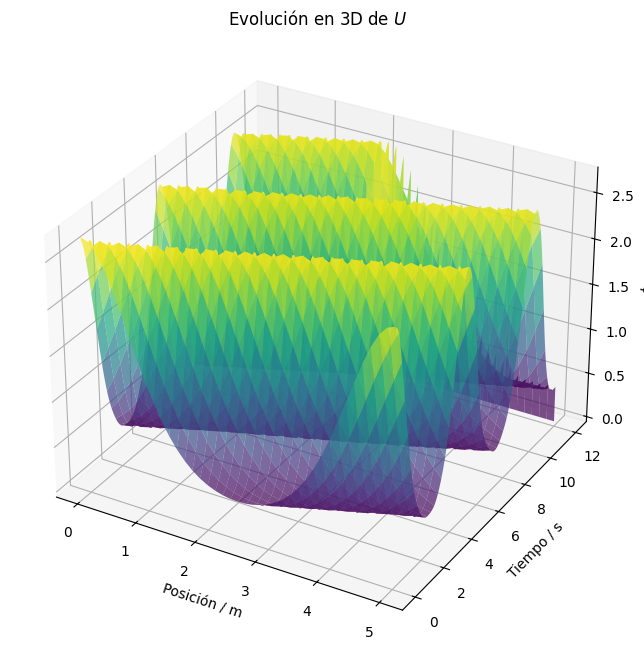

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X, T = np.meshgrid(x, t)

# Graficar U
ax.plot_surface(X, T, U_all, cmap='viridis', alpha=0.7)

ax.set_title("Evolución en 3D de $U$")
ax.set_xlabel("Posición / m")
ax.set_ylabel("Tiempo / s")
ax.set_zlabel("$\phi$")

plt.show()

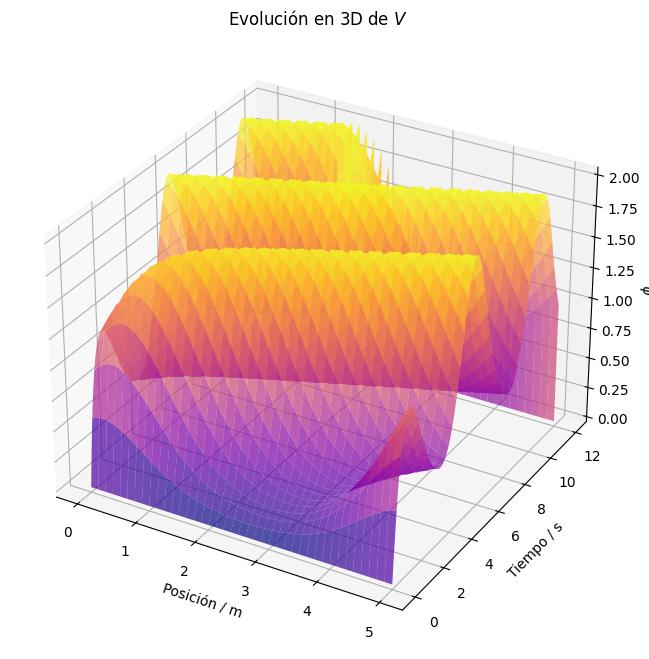

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

X, T = np.meshgrid(x, t)

# Graficar V
ax.plot_surface(X, T, V_all, cmap='plasma', alpha=0.7)

ax.set_title("Evolución en 3D de $V$")
ax.set_xlabel("Posición / m")
ax.set_ylabel("Tiempo / s")
ax.set_zlabel("$\phi$")

plt.show()

<ipython-input-56-29b0814b3075>:19: RuntimeWarning: overflow encountered in scalar subtract
  UFut[i] = UPre[i] +(-c*dt)/(2*dx)*(UPre[i+1]-UPre[i-1])
<ipython-input-56-29b0814b3075>:18: RuntimeWarning: invalid value encountered in scalar subtract
  VFut[i] = rho*dt*(UPre[i]-VPre[i])+VPre[i]
<ipython-input-56-29b0814b3075>:19: RuntimeWarning: invalid value encountered in scalar add
  UFut[i] = UPre[i] +(-c*dt)/(2*dx)*(UPre[i+1]-UPre[i-1])
<ipython-input-56-29b0814b3075>:19: RuntimeWarning: invalid value encountered in scalar subtract
  UFut[i] = UPre[i] +(-c*dt)/(2*dx)*(UPre[i+1]-UPre[i-1])
<ipython-input-56-29b0814b3075>:19: RuntimeWarning: overflow encountered in scalar add
  UFut[i] = UPre[i] +(-c*dt)/(2*dx)*(UPre[i+1]-UPre[i-1])


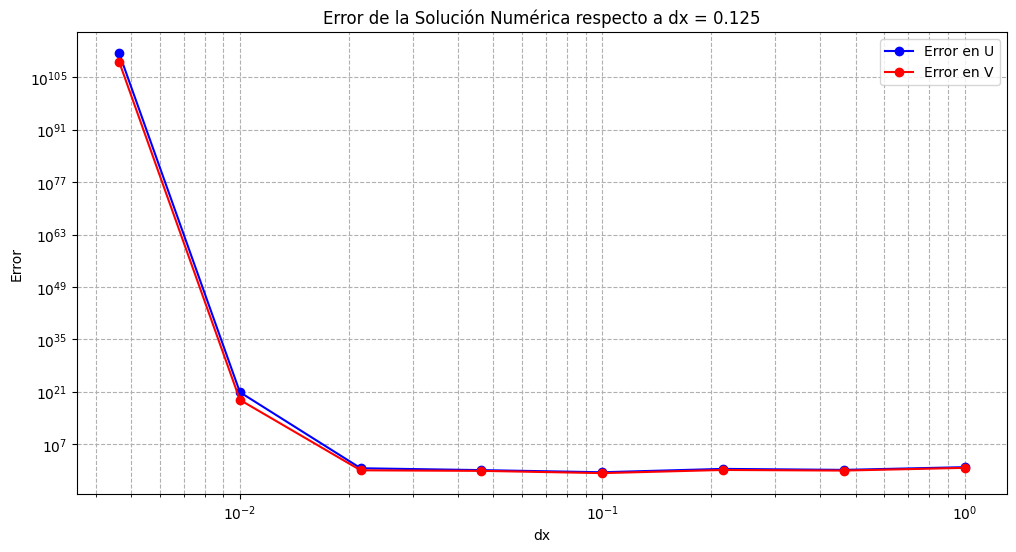

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def solucionador01(x0, xf, dx, t0, tf, dt, c, rho):
    x = np.arange(x0, xf+dx, dx)
    t = np.arange(t0, tf+dt, dt)

    UPre = np.zeros(len(x))
    VPre = np.zeros(len(x))
    for i in range(len(x)):
        UPre[i] = np.exp(np.cos((2 * np.pi * (i*dx)) / xf))

    UFut = np.zeros(len(x))
    VFut = np.zeros(len(x))

    for n in range(1, len(t)-1):
        for i in range(1, len(x)-1):
            VFut[i] = rho*dt*(UPre[i]-VPre[i])+VPre[i]
            UFut[i] = UPre[i] +(-c*dt)/(2*dx)*(UPre[i+1]-UPre[i-1])
        # Condiciones de frontera periódicas
        UFut[0] = UFut[-2]
        UFut[-1] = UFut[1]
        UPre[:] = UFut[:]
        VFut[0] = VFut[-2]
        VFut[-1] = VFut[1]
        VPre[:] = VFut[:]

    return x, UFut, VFut

x0 = 0
xf = 5
t0 = 0
tf = 12
dt = 0.001
c = 1
rho = 1

# Solución de referencia con dx=0.125
dx_ref = 0.125
x_ref, U_ref, V_ref = solucionador01(x0, xf, dx_ref, t0, tf, dt, c, rho)

# Valores de dx decreciendo logarítmicamente
dx_values = np.logspace(0, -3, num=10)  # De 1 a 0.001

errors_U = []
errors_V = []

# Calculamos el error para cada dx
for dx in dx_values:
    x, U, V = solucionador01(x0, xf, dx, t0, tf, dt, c, rho)

    # Interpolamos para igualar dimensiones de x
    U_interp = np.interp(x_ref, x, U)
    V_interp = np.interp(x_ref, x, V)

    # Calculamos la norma del error
    error_U = np.linalg.norm(U_ref - U_interp)
    error_V = np.linalg.norm(V_ref - V_interp)

    errors_U.append(error_U)
    errors_V.append(error_V)

# Graficamos el error
plt.figure(figsize=(12, 6))

plt.plot(dx_values, errors_U, '-ob', label='Error en U')
plt.plot(dx_values, errors_V, '-or', label='Error en V')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("dx")
plt.ylabel("Error")
plt.title("Error de la Solución Numérica respecto a dx = 0.125")
plt.legend()
plt.grid(True, which="both", ls="--")

plt.show()


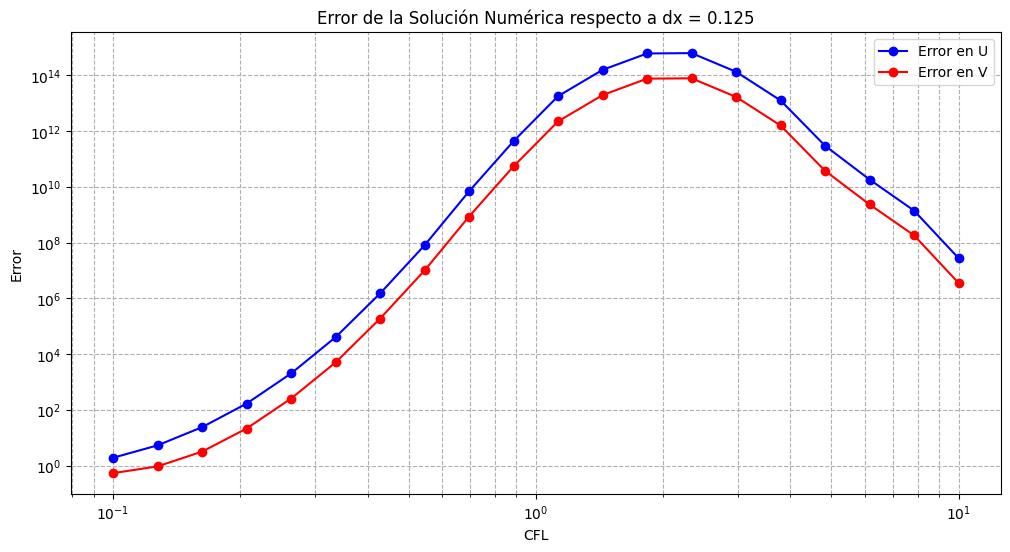

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def solucionador01(x0, xf, dx, t0, tf, dt, c, rho):
    x = np.arange(x0, xf+dx, dx)
    t = np.arange(t0, tf+dt, dt)

    UPre = np.zeros(len(x))
    VPre = np.zeros(len(x))
    for i in range(len(x)):
        UPre[i] = np.exp(np.cos((2 * np.pi * (i*dx)) / xf))

    UFut = np.zeros(len(x))
    VFut = np.zeros(len(x))

    for n in range(1, len(t)-1):
        for i in range(1, len(x)-1):
            VFut[i] = rho*dt*(UPre[i]-VPre[i])+VPre[i]
            UFut[i] = UPre[i] +(-c*dt)/(2*dx)*(UPre[i+1]-UPre[i-1])
        # Condiciones de frontera periódicas
        UFut[0] = UFut[-2]
        UFut[-1] = UFut[1]
        UPre[:] = UFut[:]
        VFut[0] = VFut[-2]
        VFut[-1] = VFut[1]
        VPre[:] = VFut[:]

    return x, UFut, VFut

x0 = 0
xf = 5
t0 = 0
tf = 12
dt = 0.0001
c = 1
rho = 1

# Solución de referencia con dx=0.125
dx_ref = 0.125
x_ref, U_ref, V_ref = solucionador01(x0, xf, dx_ref, t0, tf, dt, c, rho)

# Rango de valores de CFL
CFL_values = np.logspace(-1, 1, num=20)  # De 0.1 a 10

errors_U = []
errors_V = []

# Calculamos el error para cada CFL
for CFL in CFL_values:
    dx = 0.125  # Mantener dx constante
    dt = CFL * dx / c  # Ajustar dt según el valor de CFL
    x, U, V = solucionador01(x0, xf, dx, t0, tf, dt, c, rho)

    # Interpolamos para igualar dimensiones de x
    U_interp = np.interp(x_ref, x, U)
    V_interp = np.interp(x_ref, x, V)

    # Calculamos la norma del error
    error_U = np.linalg.norm(U_ref - U_interp)
    error_V = np.linalg.norm(V_ref - V_interp)

    errors_U.append(error_U)
    errors_V.append(error_V)

# Graficamos el error
plt.figure(figsize=(12, 6))

plt.plot(CFL_values, errors_U, '-ob', label='Error en U')
plt.plot(CFL_values, errors_V, '-or', label='Error en V')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("CFL")
plt.ylabel("Error")
plt.title("Error de la Solución Numérica respecto a dx = 0.125")
plt.legend()
plt.grid(True, which="both", ls="--")

plt.show()
